# Import Libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score

import os
for dirname, _, filenames in os.walk('/content/NFLX.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings

# Data Loading

In [33]:
df = pd.read_csv("/content/NFLX.csv")

In [34]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
1,2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2,2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
3,2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
4,2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000
5,2015-12-23,116.910004,118.559998,115.779999,118.160004,118.160004,9324300
6,2015-12-24,118.220001,118.800003,117.300003,117.330002,117.330002,3531300
7,2015-12-28,117.260002,117.349998,113.849998,117.110001,117.110001,8424300
8,2015-12-29,118.190002,119.599998,116.919998,119.120003,119.120003,8159200
9,2015-12-30,118.949997,119.019997,116.430000,116.709999,116.709999,8149700


In [35]:
viz = df.copy()

# Data Preparation

In [36]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [37]:
df.shape

(1007, 7)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1007 non-null   object 
 1   Open       1007 non-null   float64
 2   High       1007 non-null   float64
 3   Low        1007 non-null   float64
 4   Close      1007 non-null   float64
 5   Adj Close  1007 non-null   float64
 6   Volume     1007 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.2+ KB


In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1007.0,2.267081e+02,1.033054e+02,8.057000e+01,1.257800e+02,1.978500e+02,3.255300e+02,4.213800e+02
High,1007.0,2.299730e+02,1.048513e+02,8.470000e+01,1.271650e+02,1.994400e+02,3.308350e+02,4.232100e+02
Low,1007.0,2.231057e+02,1.014586e+02,7.995000e+01,1.243550e+02,1.953300e+02,3.188700e+02,4.130800e+02
Close,1007.0,2.266702e+02,1.032038e+02,8.279000e+01,1.255150e+02,1.980000e+02,3.252200e+02,4.189700e+02
Adj Close,1007.0,2.266702e+02,1.032038e+02,8.279000e+01,1.255150e+02,1.980000e+02,3.252200e+02,4.189700e+02
Volume,1007.0,9.730586e+06,6.398967e+06,1.616300e+06,5.573200e+06,7.857600e+06,1.178630e+07,5.841040e+07


In [40]:
train, test = train_test_split(df, test_size = 0.2)

In [41]:
test_pred = test.copy()

In [42]:
train.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
652,2018-07-20,364.920013,370.500000,360.140015,361.049988,361.049988,15096700
852,2019-05-08,367.920013,369.000000,361.359985,364.369995,364.369995,6572000
676,2018-08-23,348.109985,350.079987,337.649994,339.170013,339.170013,11336400
526,2018-01-19,222.750000,223.490005,218.500000,220.460007,220.460007,10548600
578,2018-04-05,293.149994,299.160004,289.109985,293.970001,293.970001,10655200
310,2017-03-13,140.899994,143.710007,140.320007,143.520004,143.520004,4922400
99,2016-05-10,91.139999,93.250000,91.089996,92.889999,92.889999,11175900
942,2019-09-16,294.230011,297.429993,289.779999,294.290009,294.290009,5307400
956,2019-10-04,268.200012,275.480011,266.470001,272.790009,272.790009,9890400
27,2016-01-27,96.610001,97.849998,90.589996,91.150002,91.150002,25556200


In [43]:
test.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
614,2018-05-25,349.899994,354.359985,348.829987,351.290009,351.290009,7817400
214,2016-10-21,122.500000,127.849998,122.309998,127.500000,127.500000,18832400
997,2019-12-03,302.220001,307.359985,301.880005,306.160004,306.160004,4992800
288,2017-02-08,143.570007,145.070007,142.559998,144.740005,144.740005,6887100
334,2017-04-17,144.429993,147.320007,144.429993,147.250000,147.250000,16364700
187,2016-09-14,97.349998,98.349998,96.959999,97.010002,97.010002,8481000
1005,2019-12-13,298.500000,301.799988,297.250000,298.500000,298.500000,3879700
959,2019-10-09,270.019989,271.000000,264.570007,267.529999,267.529999,6794400
232,2016-11-16,112.959999,116.120003,111.809998,115.190002,115.190002,5933700
953,2019-10-01,267.350006,272.200012,264.029999,269.579987,269.579987,8650300


In [44]:
x_train = train[['Open', 'High', 'Low', 'Volume']].values
x_test = test[['Open', 'High', 'Low', 'Volume']].values

In [45]:
y_train = train['Close'].values
y_test = test['Close'].values

# Linear Regression

In [46]:
model_lnr = LinearRegression()
model_lnr.fit(x_train, y_train)

LinearRegression()

In [47]:
y_pred = model_lnr.predict(x_test)

In [48]:
result = model_lnr.predict([[262.000000, 267.899994, 250.029999, 11896100]])
print(result)

[257.68673628]


# Model Evaluation

In [49]:
print("MSE",round(mean_squared_error(y_test,y_pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred), 3))

MSE 4.559
RMSE 2.135
MAE 1.501
MAPE 0.006
R2 Score :  1.0


# Model Visualization

In [50]:
def style():
    plt.figure(facecolor='black', figsize=(15,10))
    ax = plt.axes()

    ax.tick_params(axis='x', colors='white')    #setting up X-axis tick color to white
    ax.tick_params(axis='y', colors='white')    #setting up Y-axis tick color to white

    ax.spines['left'].set_color('white')        #setting up Y-axis spine color to white
    ax.spines['bottom'].set_color('white')      #setting up X-axis spine color to white

    ax.set_facecolor("black")                   # Setting the background color of the plot using set_facecolor() method

In [51]:
viz['Date']=pd.to_datetime(viz['Date'],format='%Y-%m-%d')

In [52]:
data = pd.DataFrame(viz[['Date','Close']])
data=data.reset_index()
data=data.drop('index',axis=1)
data.set_index('Date', inplace=True)
data = data.asfreq('D')
data

,Close
Date,
2015-12-16,122.639999
2015-12-17,122.510002
2015-12-18,118.019997
2015-12-19,NaN
2015-12-20,NaN
...,...
2019-12-12,298.440002
2019-12-13,298.500000
2019-12-14,NaN


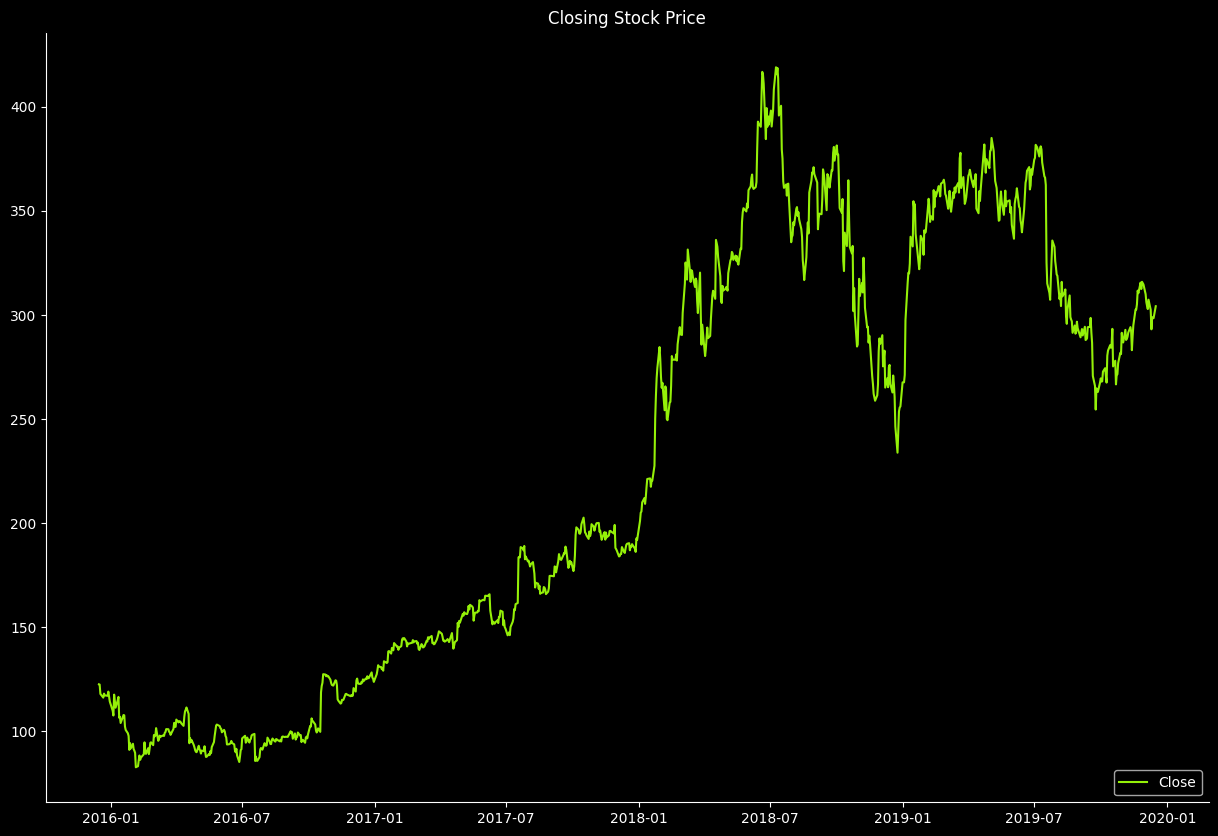

In [53]:
style()

plt.title('Closing Stock Price', color="white")
plt.plot(viz.Date, viz.Close, color="#94F008")
plt.legend(["Close"], loc ="lower right", facecolor='black', labelcolor='white')

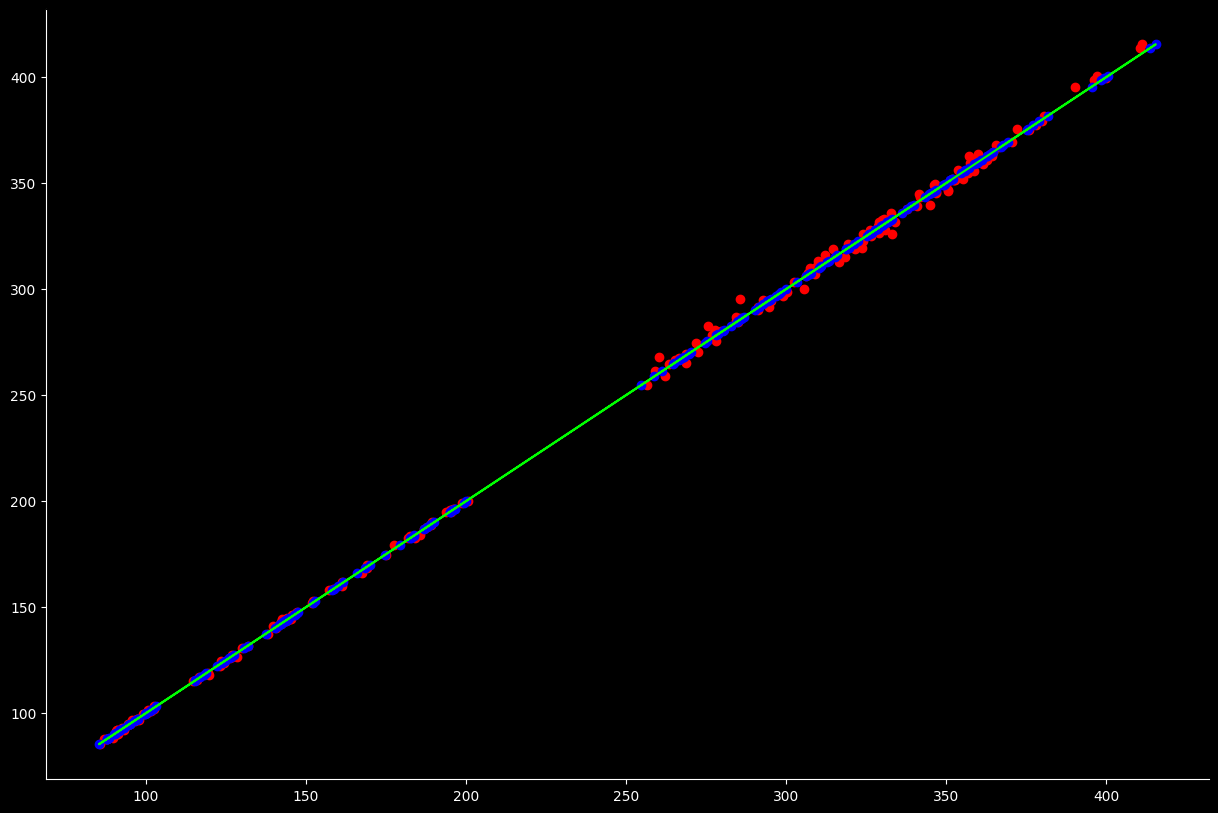

In [54]:
style()

plt.scatter(y_pred, y_test, color='red', marker='o')
plt.scatter(y_test, y_test, color='blue')
plt.plot(y_test, y_test, color='lime')

In [55]:
test_pred['Close_Prediction'] = y_pred
test_pred

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
614,2018-05-25,349.899994,354.359985,348.829987,351.290009,351.290009,7817400,352.748862
214,2016-10-21,122.500000,127.849998,122.309998,127.500000,127.500000,18832400,126.990932
997,2019-12-03,302.220001,307.359985,301.880005,306.160004,306.160004,4992800,306.232659
288,2017-02-08,143.570007,145.070007,142.559998,144.740005,144.740005,6887100,144.012626
334,2017-04-17,144.429993,147.320007,144.429993,147.250000,147.250000,16364700,146.916340
...,...,...,...,...,...,...,...,...
276,2017-01-23,138.649994,139.490005,137.309998,137.389999,137.389999,7433900,138.271597
734,2018-11-14,300.399994,301.839996,278.299988,286.730011,286.730011,16853600,284.363057
210,2016-10-17,100.500000,100.730003,98.379997,99.800003,99.800003,26589500,99.124381
603,2018-05-10,331.500000,332.059998,327.339996,329.600006,329.600006,5302300,328.570029


In [56]:
test_pred[['Close', 'Close_Prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,202.0,240.651238,101.280811,85.330002,143.342499,272.449997,331.154998,415.440002
Close_Prediction,202.0,240.461374,101.163696,85.599175,142.721783,272.229173,330.279564,411.139343


**Actual Close Price vs. Predicted Close Price**
<div class="flourish-embed flourish-chart" data-src="visualisation/13412598"><script src="https://public.flourish.studio/resources/embed.js"></script></div>

# Saving the Data as CSV

In [57]:
test_pred['Date'] = pd.to_datetime(test_pred['Date'],format='%Y-%m-%d')

In [58]:
output = pd.DataFrame(test_pred[['Date', 'Close', 'Close_Prediction']])
output = output.reset_index()
output = output.drop('index',axis=1)
output.set_index('Date', inplace=True)
output =  output.asfreq('D')
output

,Close,Close_Prediction
Date,,
2015-12-18,118.019997,119.740199
2015-12-19,NaN,NaN
2015-12-20,NaN,NaN
2015-12-21,NaN,NaN
2015-12-22,NaN,NaN
...,...,...
2019-12-09,NaN,NaN
2019-12-10,NaN,NaN
2019-12-11,NaN,NaN


In [59]:
output.to_csv('Close_Prediction.csv', index=True)
print("CSV successfully saved!")

CSV successfully saved!


<br>
<p style="text-align:center; font-weight:800; font-size:18px"><em>Thank you! For viewing this Notebook, do upvote if you like it and please feel free to provide feedback.</em><br>
<br>    
<p style="text-align:center"><img src="https://allfreethankyounotes.com/wp-content/uploads/2021/01/all-free-thank-you-gif-3.gif" width="480" height="373"></p>